In [2]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

%matplotlib inline

In [3]:
#import dataset

df = pd.read_csv(r"C:\Users\sharm\Documents\Vaibhav Personal Project\Credit-Risk-Analysis\bank-loan-status-dataset\credit_train.csv")




In [51]:
df.describe()

,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Mid,Emp Senior
count,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,...,9.999800e+04,99796.000000,99990.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000
mean,0.773610,1.176045e+07,0.277920,1.378277e+06,5.978540,18472.412336,18.199141,34.901321,11.12853,0.168310,...,7.607984e+05,0.117740,0.029313,0.755060,0.184790,0.48410,0.091820,0.421940,0.284150,0.39658
std,0.418496,3.178394e+07,0.447976,9.722974e+05,3.426406,12174.992609,7.015324,21.997829,5.00987,0.482705,...,8.384503e+06,0.351424,0.258182,0.430054,0.388129,0.49975,0.288773,0.493872,0.451011,0.48919
min,0.000000,1.080200e+04,0.000000,7.662700e+04,1.000000,0.000000,3.600000,0.000000,0.00000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,1.796520e+05,0.000000,9.311805e+05,3.000000,10214.162500,13.500000,16.000000,8.00000,0.000000,...,2.734380e+05,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,3.122460e+05,0.000000,1.369919e+06,6.000000,16220.300000,16.900000,32.000000,10.00000,0.000000,...,4.678740e+05,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,5.249420e+05,1.000000,1.512704e+06,10.000000,24012.057500,21.700000,51.000000,14.00000,0.000000,...,7.829580e+05,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,1.00000
max,1.000000,1.000000e+08,1.000000,1.655574e+08,10.000000,435843.280000,70.500000,176.000000,76.00000,15.000000,...,1.539738e+09,7.000000,15.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000


In [5]:
#check for credit scores greater than 850
ndf = df[df["Credit Score"]>850]
ndf.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.0,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,NaN,4.0,0.0,132468.0,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.0,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,48.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,NaN,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,NaN,5.0,0.0,474658.0,742720.0,0.0,0.0


In [6]:
#scale down all credit scores greater than 850 by factor of 10
df["Credit Score"] = df["Credit Score"].apply(lambda val: (val/10) if val>850 else val)

In [7]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,716.293447,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,28.297164,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,703.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,722.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,738.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [8]:
#about 500 values are null in Loan status

df[df["Loan Status"].isnull()].shape

(514, 19)

In [9]:
#drop the rows with Null Values
df.dropna(subset=["Loan Status"],inplace= True)

In [10]:
df[df["Loan Status"].isnull()].shape

(0, 19)

In [11]:
df.shape

(100000, 19)

In [12]:
#convert labels into encoded form 
enc = preprocessing.LabelEncoder()
df["Loan Status"] = enc.fit_transform(df["Loan Status"])

In [13]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


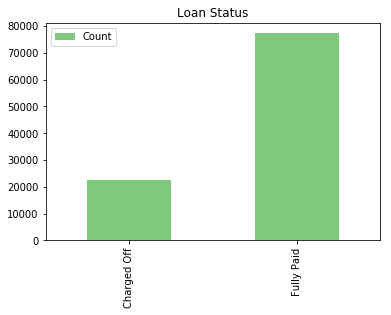

In [14]:
choffval = df[df["Loan Status"]==0]["Loan Status"].count()
fpaidval = df[df["Loan Status"]==1]["Loan Status"].count()

data = {"Count": [choffval,fpaidval]}
statusDF = pd.DataFrame(data,index = ["Charged Off","Fully Paid"])
#statusDF.head()
statusDF.plot(kind='bar',title="Loan Status",colormap = "Accent")

In [15]:
df["Term"].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

In [16]:
#encode the term column

df["Term"].replace(to_replace=["Short Term","Long Term"],value=[0,1],inplace = True)

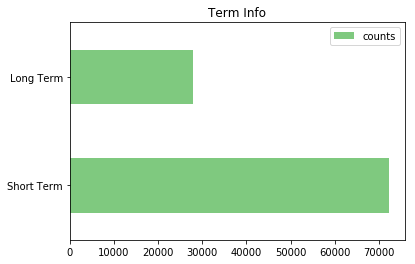

In [17]:
sterm = df[df["Term"] == 0]["Term"].count()
lterm = df[df["Term"] == 1]["Term"].count()
tdata = {"counts" : [sterm,lterm]}
termDF = pd.DataFrame(tdata, index=["Short Term","Long Term"])
termDF.plot(kind="barh",title="Term Info",colormap="Accent")

In [18]:
#check null values of credit score 
newDF = df[df["Credit Score"].notnull()]  #newDF with no NULL values
newDF.shape

(80846, 19)

In [19]:
#averaging out null values in credit score column
#for short term loans

cscoredf = df[df["Term"]==0]
stermAvg = cscoredf["Credit Score"].mean()
print(stermAvg)

724.6209386906824


In [20]:
#for long term loans

cscoredf = df[df["Term"]==1]
ltermAvg = cscoredf["Credit Score"].mean()
print(ltermAvg)

695.483727170432


In [21]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [22]:
#replace calculated averages in the main DataFrame
df.loc[(df.Term==0) & (df["Credit Score"].isnull()),"Credit Score"] = stermAvg
df.loc[(df.Term==1) & (df["Credit Score"].isnull()),"Credit Score"] = ltermAvg
df.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.000000,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,724.620939,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.000000,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.000000,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,724.620939,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,0,206602.0,0,729.000000,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,1,217646.0,0,730.000000,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,0,648714.0,1,695.483727,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,1,548746.0,0,678.000000,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,1,215952.0,0,739.000000,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [23]:
#Categorizing Credit score into different ranges

df["Credit Score"] = df["Credit Score"].apply(lambda val: "Poor" if np.isreal(val) and val<580 else val)
df["Credit Score"] = df["Credit Score"].apply(lambda val: "Fair" if np.isreal(val) and (val>=580 and val<670) else val)
df["Credit Score"] = df["Credit Score"].apply(lambda val: "Good" if np.isreal(val) and (val>=670 and val<740) else val)
df["Credit Score"] = df["Credit Score"].apply(lambda val: "Very Good" if np.isreal(val) and (val>=740 and val<800) else val)
df["Credit Score"] = df["Credit Score"].apply(lambda val: "Exceptional" if np.isreal(val) and (val>=800 and val <=850) else val)


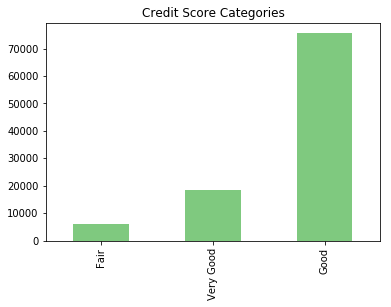

In [24]:
df["Credit Score"].value_counts().sort_values(ascending = True).plot(kind = "bar",title = "Credit Score Categories",colormap = "Accent")

In [25]:
#df.head()
#checking null values in Annual Income Column

df[df["Annual Income"].isnull()].shape

(19154, 19)

In [26]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,Good,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,Good,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,Very Good,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,Good,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,Good,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [27]:
#replace by average income

incDF = df[df["Annual Income"].notnull()]
incAvg = incDF["Annual Income"].mean()
#print(incAvg) - 1378276.56
df.loc[(df["Annual Income"].isnull()),"Annual Income"] = incAvg
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,Good,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,Good,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,Very Good,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,Good,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,Good,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [28]:
df["Annual Income"].dtypes

dtype('float64')

In [29]:
#changing Credit Score to One Hot encoded format

In [30]:
df = df.join(pd.get_dummies(df["Credit Score"],drop_first=True))
df.rename(index = str, columns={'Good':'Credit Good', 'Very Good':'Credit Very Good'})

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Good,Credit Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,Good,1.167493e+06,8 years,Home Mortgage,Home Improvements,...,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,Good,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,...,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,Very Good,2.231892e+06,8 years,Own Home,Debt Consolidation,...,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,Good,8.069490e+05,3 years,Own Home,Debt Consolidation,...,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,Good,1.378277e+06,5 years,Rent,Debt Consolidation,...,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,0,206602.0,0,Good,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,...,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,1,217646.0,0,Good,1.184194e+06,< 1 year,Home Mortgage,Debt Consolidation,...,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,1,0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,0,648714.0,1,Good,1.378277e+06,< 1 year,Home Mortgage,Buy House,...,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0,1,0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,1,548746.0,0,Good,2.559110e+06,2 years,Rent,Debt Consolidation,...,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,1,0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,1,215952.0,0,Good,1.454735e+06,< 1 year,Rent,Debt Consolidation,...,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0,1,0


In [63]:
df = df.drop(["Credit Score"],axis = 1)

In [32]:
df.Purpose.value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [33]:
loanpurposestatus = df[["Purpose","Loan Status"]]
loanpurposestatus.shape
                       

(100000, 2)

In [34]:
td = pd.crosstab(loanpurposestatus.Purpose,loanpurposestatus["Loan Status"])


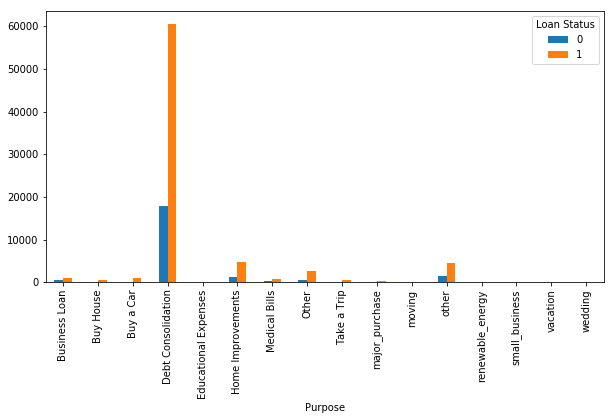

In [35]:
td.plot(kind = "bar",figsize=(10,5))

In [36]:
df["Home Ownership"].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [37]:
df = df.join(pd.get_dummies(df["Home Ownership"],drop_first=True))


In [38]:
df = df.drop(["Home Ownership"],axis=1)

In [39]:
#df.head()

In [40]:
df = df.drop(["Loan ID","Customer ID"],axis =1)

In [41]:
#df.head(50)

In [42]:
df["Years in current job"].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
n/a           4222
9 years       3955
Name: Years in current job, dtype: int64

In [43]:
df['Years in current job'] = df['Years in current job'].str.extract(r"(\d+)")
df['Years in current job'] = df['Years in current job'].astype(float)

C:\Users\sharm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [44]:
td = df[df["Years in current job"].notnull()]
tdAvg = td["Years in current job"].mean()
df["Years in current job"].fillna(np.round(tdAvg),inplace = True)

In [45]:
df["Emp history"] = df["Years in current job"].apply(lambda val: "Emp Junior" if val<4 else("Emp Mid" if val>=4 and val<8 else "Emp Senior"))

In [60]:
df = df.drop(["Years in current job"],axis =1)

In [47]:
df = df.join(pd.get_dummies(df["Emp history"],drop_first= True))

In [61]:
df = df.drop(["Emp history"],axis=1)

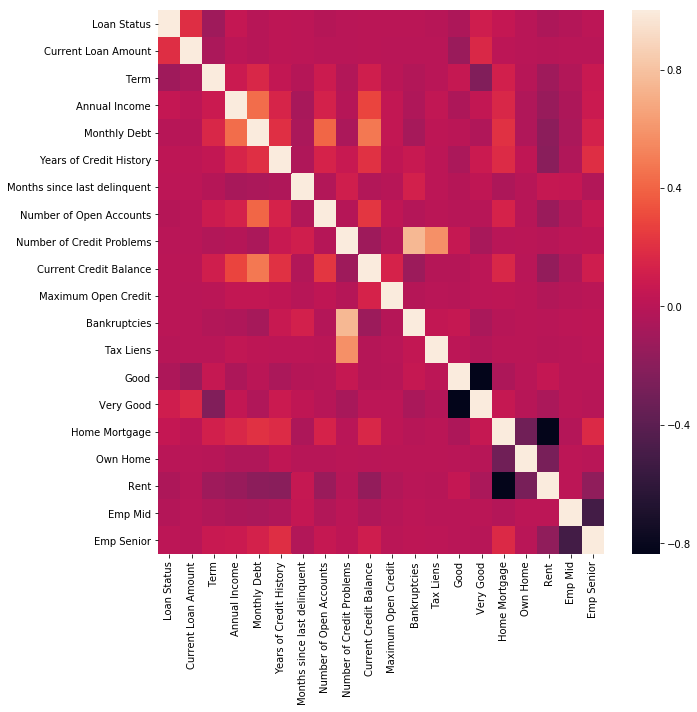

In [64]:
plt.figure(figsize=(10,10))
#df.columns
sns.heatmap(df.corr())